In [61]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go # 그래프 객체 생성
from plotly.subplots import make_subplots

# 데이터 정보



#### watt의 outlier 제거 (z-score > 3 제거))
#### 기업 환경정보 + 공공 환경정보 + 기업 발전량 정보

In [26]:


banpo1 = pd.read_csv("./banpo1_join.csv")
banpo2 = pd.read_csv("./banpo2_join.csv")
newrec1 = pd.read_csv("./NewREC1_join.csv")
newrec2 = pd.read_csv("./NewREC2_join.csv")
lh = pd.read_csv("./LH1_join.csv")
miribeol = pd.read_csv("./miribeol_join.csv")
ongok = pd.read_csv("./ongok_join.csv")
# myosan = pd.read_csv("./myosan_join.csv")

banpo1.head(5)

,Unnamed: 0,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp,pow_dcv,pow_dca,watt,기온,강수량,풍속,풍향,습도,일조,일사,적설,전운량,지중온도,match_solar,z_score
0,2018-10-22 12:00,333.375000,321.937500,25.050000,17.881250,480.116279,11.560465,5536.874419,18.2,0.0,1.0,20.0,34.0,1.0,2.03,0.0,5.0,14.9,563.888889,0.094692
1,2018-10-22 13:00,490.514286,563.442857,28.157143,18.405714,481.428571,14.126531,6808.306122,19.4,0.0,1.2,180.0,35.0,0.8,1.73,0.0,9.0,15.9,480.555556,0.416194
2,2018-10-22 14:00,368.214286,426.042857,26.777143,19.221429,483.090909,10.850909,5217.690909,20.6,0.0,2.2,180.0,30.0,0.7,1.69,0.0,8.0,16.7,469.444444,0.013982
3,2018-10-22 15:00,242.214286,294.400000,21.861429,18.455714,483.459016,6.842623,3306.254098,20.2,0.0,1.6,180.0,31.0,1.0,1.25,0.0,8.0,17.4,347.222222,-0.469355
4,2018-10-22 16:00,116.159420,132.362319,18.288406,17.346377,480.047619,3.265079,1589.776190,19.7,0.0,1.6,270.0,34.0,0.7,0.88,0.0,9.0,17.9,244.444444,-0.903394


In [30]:
banpo1_date = pd.to_datetime(banpo1["Unnamed: 0"])
banpo2_date = pd.to_datetime(banpo2["Unnamed: 0"])
newrec1_date = pd.to_datetime(newrec1["Unnamed: 0"])
newrec2_date = pd.to_datetime(newrec2["Unnamed: 0"])
lh_date = pd.to_datetime(lh["Unnamed: 0"])
miribeol_date = pd.to_datetime(miribeol["Unnamed: 0"])
ongok_date = pd.to_datetime(ongok["Unnamed: 0"])

banpo1.index = banpo1_date
banpo2.index = banpo2_date
newrec1.index = newrec1_date
newrec2.index = newrec2_date
lh.index = lh_date
miribeol.index = miribeol_date
ongok.index = ongok_date

In [31]:
banpo1.describe()
# sns.boxplot()

banpo1 = banpo1[["env_slopesolar", "env_levelsolar", "match_solar", "watt"]]
banpo2 = banpo2[["env_slopesolar", "env_levelsolar", "match_solar", "watt"]]
newrec1 = newrec1[["env_slopesolar", "env_levelsolar", "match_solar", "watt"]]
newrec2 = newrec2[["env_slopesolar", "env_levelsolar", "match_solar", "watt"]]
lh = lh[["env_slopesolar", "env_levelsolar", "match_solar", "watt"]]
ongok = ongok[["env_slopesolar", "env_levelsolar", "match_solar", "watt"]]
banpo1
# myosan = myosan[["env_slopesolar", "env_levelsolar", "match_solar", "watt"]]

,env_slopesolar,env_levelsolar,match_solar,watt
Unnamed: 0,,,,
2018-10-22 12:00:00,333.375000,321.937500,563.888889,5536.874419
2018-10-22 13:00:00,490.514286,563.442857,480.555556,6808.306122
2018-10-22 14:00:00,368.214286,426.042857,469.444444,5217.690909
2018-10-22 15:00:00,242.214286,294.400000,347.222222,3306.254098
2018-10-22 16:00:00,116.159420,132.362319,244.444444,1589.776190
...,...,...,...,...
2020-10-22 14:00:00,491.916667,695.333333,563.888889,7211.983333
2020-10-22 15:00:00,385.500000,638.750000,472.222222,5104.866667
2020-10-22 16:00:00,154.000000,280.461538,366.666667,1734.030769


In [59]:


def boxplot():
    f, axes = plt.subplots(2, 3, figsize=(12, 5))
    
    sns.boxplot(data = banpo1[["env_slopesolar", "env_levelsolar", "match_solar"]], ax=axes[0][0])
    sns.boxplot(data = banpo2[["env_slopesolar", "env_levelsolar", "match_solar"]], ax=axes[0][1])
    sns.boxplot(data = newrec1[["env_slopesolar", "env_levelsolar", "match_solar"]], ax=axes[0][2])
    sns.boxplot(data = newrec2[["env_slopesolar", "env_levelsolar", "match_solar"]], ax=axes[1][0])
    sns.boxplot(data = lh[["env_slopesolar", "env_levelsolar", "match_solar"]], ax=axes[1][1])
    sns.boxplot(data = ongok[["env_slopesolar", "env_levelsolar", "match_solar"]], ax=axes[1][2])

In [140]:
def resampleD_sum(df):
    return df.resample('D').sum()


def delete_zero(df):
    df = df[(df["env_slopesolar"] != 0 ) & ( df["env_levelsolar"] != 0 ) & ( df["match_solar"] != 0 )]
    
    return df


def mean_absolute_percentage_error(a, b, df):

    a_set, b_set = np.array(df[a]), np.array(df[b])

    return np.mean(np.abs((a_set - b_set) / a_set)) * 100 ##, np.abs((a_set - b_set) / a_set)

def make_graph(a, b, df):
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    fig.add_trace(go.Scatter(x=df.index, y=df[a], mode='lines', name=a, line=dict(color='blue')), secondary_y = False)
    fig.add_trace(go.Scatter(x=df.index, y=df[b], mode='lines', name=b, line=dict(color='red')), secondary_y = False)
    fig.update_layout(width=1000, height=500,)
    fig.show()

def corr(a, b, df):
    return df[[a, b]].corr()


banpo1  -  env_levelsolar , match_solar  :  26.09659066044756
banpo2  -  env_levelsolar , match_solar  :  27.853654750808026
newrec1  -  env_levelsolar , match_solar  :  27.176067721165392
newrec2  -  env_levelsolar , match_solar  :  18.718364384109766
lh  -  env_levelsolar , match_solar  :  23.10102702446479
ongok  -  env_levelsolar , match_solar  :  29.729372176216422
--------------------
banpo1  -  env_slopesolar , match_solar  :  10.775097655349839
banpo2  -  env_slopesolar , match_solar  :  11.735886480103566
newrec1  -  env_slopesolar , match_solar  :  28.767966583918902
newrec2  -  env_slopesolar , match_solar  :  19.788598863380557
lh  -  env_slopesolar , match_solar  :  27.470952433522868
ongok  -  env_slopesolar , match_solar  :  41.18234435024915


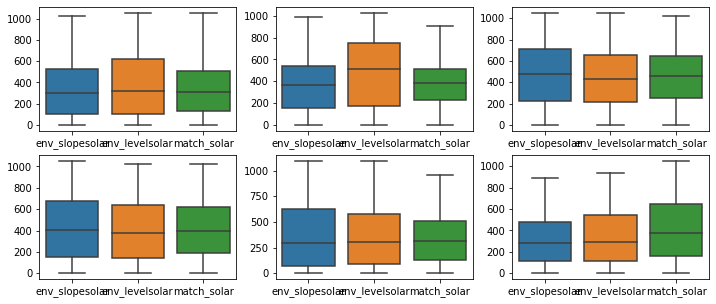

In [110]:
banpo1_day = delete_zero(resampleD_sum(banpo1))
banpo2_day = delete_zero(resampleD_sum(banpo2))
newrec1_day = delete_zero(resampleD_sum(newrec1))
newrec2_day = delete_zero(resampleD_sum(newrec2))
lh_day = delete_zero(resampleD_sum(lh))
ongok_day = delete_zero(resampleD_sum(ongok))

def for_print(a, b, name, df):

    print(name," - ", a,",", b," : ", mean_absolute_percentage_error(a, b, df))

for_print("env_levelsolar", "match_solar", "banpo1", banpo1_day)
for_print("env_levelsolar", "match_solar", "banpo2", banpo2_day)
for_print("env_levelsolar", "match_solar", "newrec1", newrec1_day)
for_print("env_levelsolar", "match_solar", "newrec2", newrec2_day)
for_print("env_levelsolar", "match_solar", "lh", lh_day)
for_print("env_levelsolar", "match_solar", "ongok", ongok_day)
print("--------------------")

for_print("env_slopesolar", "match_solar", "banpo1", banpo1_day)
for_print("env_slopesolar", "match_solar", "banpo2", banpo2_day)
for_print("env_slopesolar", "match_solar", "newrec1", newrec1_day)
for_print("env_slopesolar", "match_solar", "newrec2", newrec2_day)
for_print("env_slopesolar", "match_solar", "lh", lh_day)
for_print("env_slopesolar", "match_solar", "ongok", ongok_day)

boxplot()


In [131]:
make_graph("env_slopesolar", "match_solar", banpo1_day)
make_graph("env_slopesolar", "match_solar", ongok_day)
make_graph("env_levelsolar", "match_solar", lh_day)

2.393488827962994 6.040975244625237 11.281230886319943 220.64723820659972
12.71996443944617 22.127831695764165 34.594102894906634 309.2877642158705
21.280911429546585 34.348886171238576 49.06811008885947 325.2012773793222


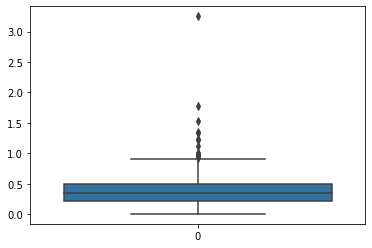

In [139]:
_, diff = mean_absolute_percentage_error("env_slopesolar", "match_solar", banpo1_day)
_, diff2 = mean_absolute_percentage_error("env_levelsolar", "match_solar", banpo1_day)
_, diff3 = mean_absolute_percentage_error("env_slopesolar", "match_solar", ongok_day)

print(np.quantile(diff, 0.25)*100, np.quantile(diff, 0.5)*100, np.quantile(diff, 0.75)*100, np.quantile(diff, 1)*100 )
print(np.quantile(diff2, 0.25)*100, np.quantile(diff2, 0.5)*100, np.quantile(diff2, 0.75)*100, np.quantile(diff2, 1)*100 )
print(np.quantile(diff3, 0.25)*100, np.quantile(diff3, 0.5)*100, np.quantile(diff3, 0.75)*100, np.quantile(diff3, 1)*100 )
sns.boxplot(data = diff3)

In [124]:
corr("env_slopesolar", "match_solar", ongok_day)

,env_slopesolar,match_solar
env_slopesolar,1.000000,0.955769
match_solar,0.955769,1.000000


In [141]:
def reset_match(a, b, df):
    df["reset_match"] = df[b] * df[a].mean() / df[b].mean()

    return df
# ongok_day["reset_match"] = ongok_day["match_solar"] * 3109.861398 / 4145.840605

ongok_day = reset_match("env_slopesolar", "match_solar", ongok_day) 
for_print("env_slopesolar", "reset_match", "ongok", ongok_day)
# banpo1_day

# sns.boxplot(data=ongok_day[["env_slopesolar", "reset_match"]])

ongok  -  env_slopesolar , reset_match  :  16.02683956613381


In [132]:
make_graph("env_levelsolar", "reset_match", lh_day)